<a href="https://colab.research.google.com/github/pranitha2144/SignLanguagetoText/blob/main/Experiment0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense , Dropout
sz=128

In [3]:
# Initializing the CNN
classifier = Sequential()

In [4]:
# First convolution layer and pooling
classifier.add(Convolution2D(32, (3, 3), input_shape=(sz, sz, 1), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
# Second convolution layer and pooling
classifier.add(Convolution2D(32, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
classifier.add(MaxPooling2D(pool_size=(2, 2)))

In [5]:
# Flattening the layers
classifier.add(Flatten())

# Adding a fully connected layer
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(0.40))
classifier.add(Dense(units=96, activation='relu'))
classifier.add(Dropout(0.40))
classifier.add(Dense(units=64, activation='relu'))
classifier.add(Dense(units=27, activation='softmax')) # softmax for more than 2

# Compiling the CNN
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
# Step 2 - Preparing the train/test data and training the model
classifier.summary()
# Code copied from - https://keras.io/preprocessing/image/
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28800)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3686528   
_________________________________________________________________
dropout (Dropout)            (None, 128)              

In [7]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Major project- IV-II/train',
                                                 target_size=(sz, sz),
                                                 batch_size=10,
                                                 color_mode='grayscale',
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Major project- IV-II/test',
                                            target_size=(sz , sz),
                                            batch_size=10,
                                            color_mode='grayscale',
                                            class_mode='categorical') 


Found 12845 images belonging to 27 classes.
Found 4268 images belonging to 27 classes.


In [8]:
hist=classifier.fit(
        training_set, # No of images in training set
        epochs=10,
        validation_data=test_set)

Epoch 1/10
1285/1285 [==============================] - 3895s 3s/step - loss: 2.8120 - accuracy: 0.1648 - val_loss: 0.7234 - val_accuracy: 0.7870
Epoch 2/10
1285/1285 [==============================] - 266s 207ms/step - loss: 1.3975 - accuracy: 0.5245 - val_loss: 0.4358 - val_accuracy: 0.8732
Epoch 3/10
1285/1285 [==============================] - 265s 206ms/step - loss: 1.0805 - accuracy: 0.6289 - val_loss: 0.2513 - val_accuracy: 0.9335
Epoch 4/10
1285/1285 [==============================] - 266s 207ms/step - loss: 0.8794 - accuracy: 0.7015 - val_loss: 0.1971 - val_accuracy: 0.9374
Epoch 5/10
1285/1285 [==============================] - 265s 206ms/step - loss: 0.7906 - accuracy: 0.7315 - val_loss: 0.1682 - val_accuracy: 0.9604
Epoch 6/10
1285/1285 [==============================] - 264s 205ms/step - loss: 0.7461 - accuracy: 0.7423 - val_loss: 0.1546 - val_accuracy: 0.9461
Epoch 7/10
1285/1285 [==============================] - 262s 204ms/step - loss: 0.6528 - accuracy: 0.7868 - val_lo

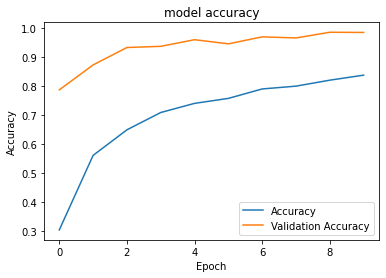

In [9]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])

plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])
plt.show()

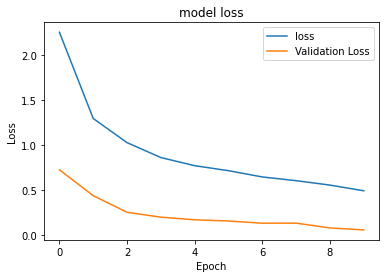

In [10]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["loss","Validation Loss"])
plt.show()

In [11]:
# Saving the model
model_json = classifier.to_json()
with open("/content/drive/MyDrive/Major project- IV-II/models/model-bwexp0.json", "w") as json_file:
    json_file.write(model_json)
print('Model Saved')
classifier.save_weights('/content/drive/MyDrive/Major project- IV-II/models/model-bwexp0.h5')
print('Weights saved')

Model Saved
Weights saved
